# Customer Lifetime Value
---

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation


## **1. Business Problem Understanding**
---

**1.1. Context**

Sebuah perusahaan yang bergerak di bidang car insurance ingin meningkatkan income dan profitnya.
Dari data customernya perusahaan ingin melakukan evalusi mengenai aspek apa saja yang dapat memberikan pengaruh dalam peningkatan profit perusahaan.

Target yang akan digunakan untuk evalusai customer adalah dengan menggunakan nilai customer lifetime value (CLV). CLV adalah ukuran yang digunakan oleh perusahaan untuk menentukan nilai finansial yang dapat dihasilkan dari sebuah pelanggan selama periode waktu tertentu, biasanya sepanjang hubungan bisnis mereka.

Secara sederhana, CLV adalah prediksi atas nilai total pendapatan yang bisa perusahaan dapatkan dari customernya. Semakin besar CLV maka semakin besar juga profit perusahaan

**1.2. Problem Statement**
 
Permasalahan perusahaan car insurance ini adalah bagaimana perusahaan membuat strategi baru untuk meningkatkan income dan profit perusahaan sehingga dapat mengembangkan bisnisnya lebih besar ?

**1.3. Goals**

Perusahaan car insurance ini perlu memiliki model ML yang dapat memprediksi CLV, sehingga dapat membantu untuk membuat startegi yang tepat dalam memberikan income dan profit kepada perusahaan.

**1.4. Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang dapat membedakan satu customer dengan yang lainnya.

Selanjutnya, kita akan membangun suatu model ML regresi yang akan membantu perusahaan untuk dapat memprediksi CLV dari setiap customer, sehingga akan berguna untuk menentukan aspek apa saja yang berpengaruh dalam memberikan profit kepada perusahaan dan perusahaan bisa mengambil keputusan bisnis yang tepat dari nilai CLV yang diprediksi model.

**1.5. Metric Evaluation**

Evaluasi metrik yang akan digunakan yaitu:
- RMSE adalah nilai rataan akar kuadrat dari error 
- MAE adalah rataan nilai absolut dari error
- MAPE adalah rataan nilai persentase error yang dihasilkan oleh model regresi
- R-squared adalah nilai seberapa baik model dapat merepresentasikan varians keseluruhan data

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi sesuai dengan limitasi fitur yang digunakan. 

Semakin mendekati 1 nilai R-squared yang dihasilkan, berarti semakin fit pula modelnya terhadap data observasi.

## **2. Data Understanding**
---

### **2.1. Data Information**

- Dataset yang digunakan berisi informasi customer dan informasi polis asuransi mereka dari sejak awal menggunakan asuransi perusahaan car insurance.
- Setiap baris data merepresentasikan informasi terkait keterangan seorang customer dengan polis asuransi kendaraan miliknya.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class             | Object    | Tipe kendaraan |
| Coverage                  | Object    | Jenis pertanggungan polis asuransi customer |
| Renew Offer Type          | Object    | Penawaran untuk pembaruan polis |
| EmploymentStatus          | Object    | Status pekerjaan cutomer |
| Marital Status            | Object    | Status pernikahan cutomer |
| Education                 | Object    | Tingkat pendidikan customer |
| Number of Policies        | Float     | Jumlah polis yang dimiliki customer |
| Monthly Premium Auto      | Float     | Premi customer perbulan (USD) |
| Total Claim Amount        | Float     | Jumlah claim customer (USD) |
| Income                    | Float     | Pendapatan cutomer (USD) |
| Customer Lifetime Value   | Float     | Customer Lifetime Value (Target) |

In [80]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [81]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [82]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df.sample(10)

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
176,Four-Door Car,Extended,Offer1,Unemployed,Married,College,2.0,86.0,412.800000,0.0,9006.598402
3442,Four-Door Car,Extended,Offer1,Unemployed,Married,Master,1.0,99.0,378.261483,0.0,3687.169374
3024,Four-Door Car,Basic,Offer2,Employed,Single,High School or Below,3.0,71.0,340.800000,74454.0,5595.389905
4946,Four-Door Car,Basic,Offer1,Retired,Married,Bachelor,2.0,67.0,404.817249,23665.0,22658.536520
2782,Two-Door Car,Basic,Offer1,Employed,Married,College,5.0,70.0,283.743206,39507.0,5607.253592
4912,Sports Car,Basic,Offer2,Medical Leave,Married,High School or Below,2.0,106.0,763.200000,28879.0,12023.750620
1470,Four-Door Car,Basic,Offer4,Disabled,Married,High School or Below,2.0,64.0,455.191595,22249.0,17041.438300
73,Four-Door Car,Extended,Offer1,Unemployed,Divorced,Master,1.0,95.0,476.903351,0.0,3370.074728
2466,Four-Door Car,Basic,Offer4,Employed,Married,College,1.0,67.0,320.629479,60060.0,2690.477161
3279,Four-Door Car,Basic,Offer2,Disabled,Married,Bachelor,2.0,73.0,424.330166,23815.0,8257.666512


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [84]:
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


Dari descriptive statistic diatas kita dapat melihat:
- Pada data numerik kita mendapat insight mengenai count, mean, std, dll
- Pada data kategorik kita mendapat insight mengenai karakteristik polis yang paling banyak dimiliki customer dan karakteristik customer itu sendiri.
karakteristik polis yang paling dominan adalah untuk kendaraan tipe Four-Door Car, coverage tipe Basic, dan Renew Offer tipe 1.
karakteristik customer yang paling dominan adalah yang sudah bekerja, menikah, dan tingkat pendidikan sarjana.

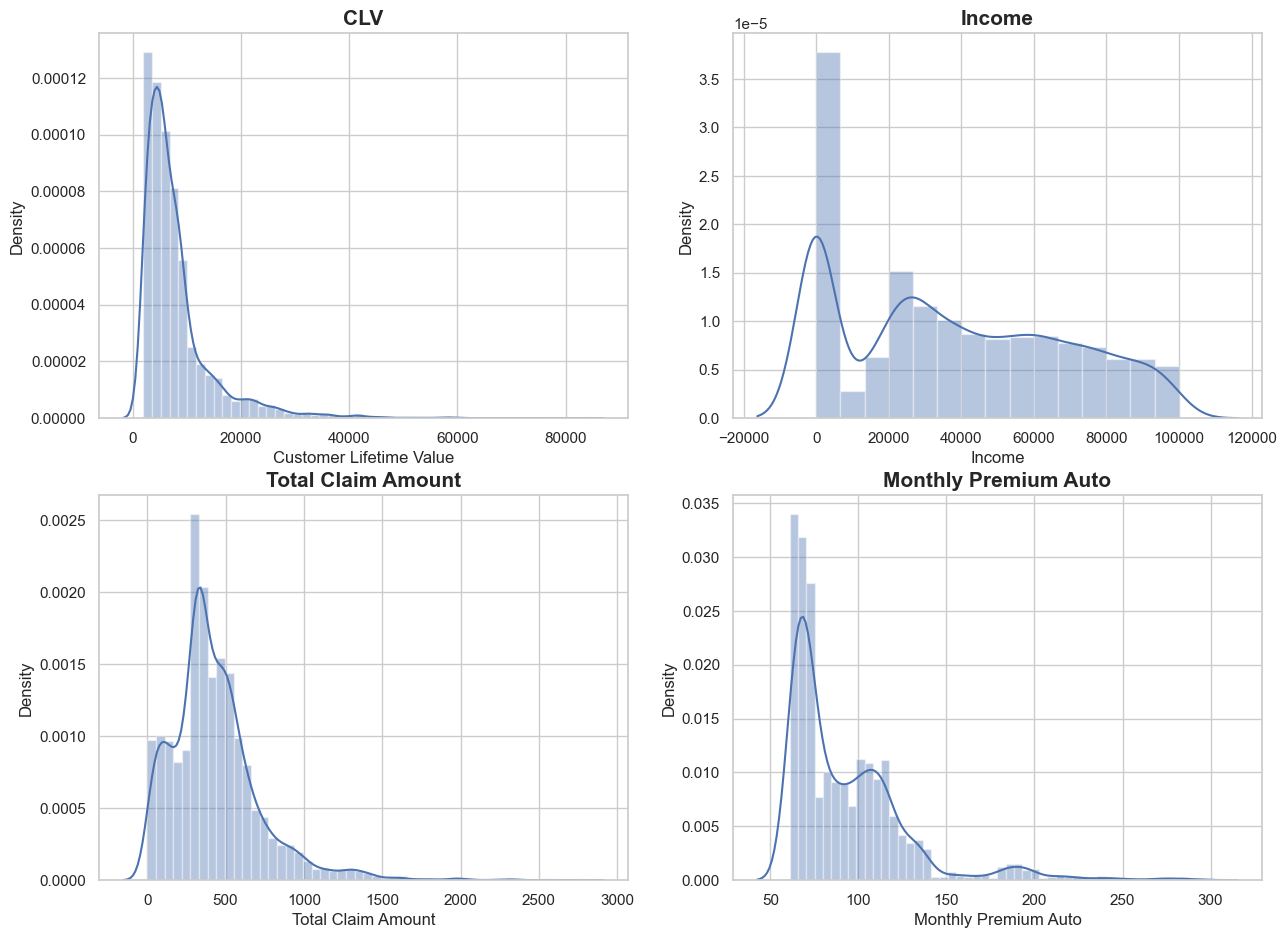

In [85]:
fig = plt.figure(figsize=(15,11))

#  subplot #1
plt.subplot(221)
plt.title('CLV', size=15, weight='bold')
sns.distplot(df['Customer Lifetime Value'])

#  subplot #2
plt.subplot(222)
plt.title('Income', size=15, weight='bold')
sns.distplot(df['Income'])

#  subplot #3
plt.subplot(223)
plt.title('Total Claim Amount', size=15, weight='bold')
sns.distplot(df['Total Claim Amount'])

#  subplot #4
plt.subplot(224)
plt.title('Monthly Premium Auto', size=15, weight='bold')
sns.distplot(df['Monthly Premium Auto'])

plt.show()

Dari vusialisasi distribusi pada fitur-fitur yang ada di dataset, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada CLV, Income, Total Claim Amount, Monthly Premium Auto, Number of Policies.

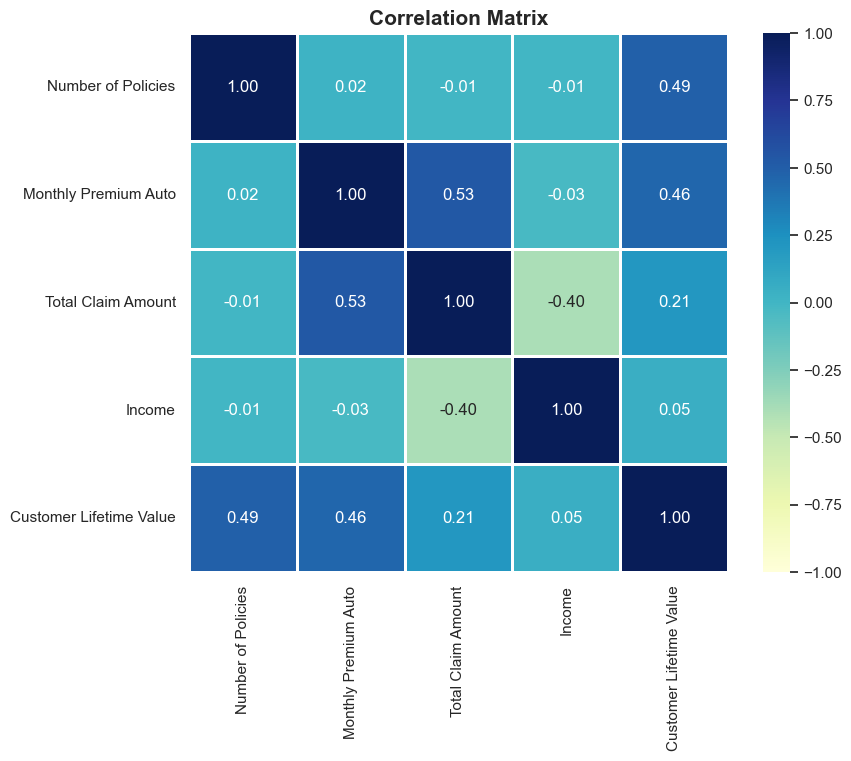

In [86]:
plt.figure(figsize=(9, 7))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='spearman')

sns.heatmap(corr, annot=True, fmt='.2f', cmap="YlGnBu", square=True, linewidths=1, vmin=-1, vmax=1,)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Korelasi yang digunakan dalam case ini adalah korelasi Spearman dikarenakan tidak memiliki syarat berdistribusi normal.

Dari correlation matrix diatas menunjukkan bahwa korelasi paling tinggi terhadap CLV dimiliki oleh fitur 'Monthly Premium Auto', dengan nilai 0.46 dan fitur 'Number of Policies' dengan nilai 0.49.

dari Nilai korelasi kedua fitur tersebut maka disimpulkan korelasi kedua fitur tersebut termasuk low positive correlation, yang berarti kedua fitur tersebut memiliki pengaruh terhadap CLV tetapi tidak kuat. 

## **3. Data Preprocessing EDA**
---

Disini, kita akan melakukan cleaning pada data yang nantinya akan kita gunakan untuk proses analisis selanjutnya. 
Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada.
- Melakukan treatment terhadap outlier jika ada.

### **3.1Hendle and Check Feaure, Duplicate, Missing Value**

In [87]:
# Membuat duplikat dataframe
df_model = df.copy()

# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().values)])

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car,..."
1,Coverage,object,0,0.0,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,0,0.0,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,object,0,0.0,5,"[Retired, Employed, Disabled, Medical Leave, U..."
4,Marital Status,object,0,0.0,3,"[Divorced, Married, Single]"
5,Education,object,0,0.0,5,"[High School or Below, College, Master, Bachel..."
6,Number of Policies,float64,0,0.0,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, ..."
8,Total Claim Amount,float64,0,0.0,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355..."
9,Income,float64,0,0.0,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, ..."


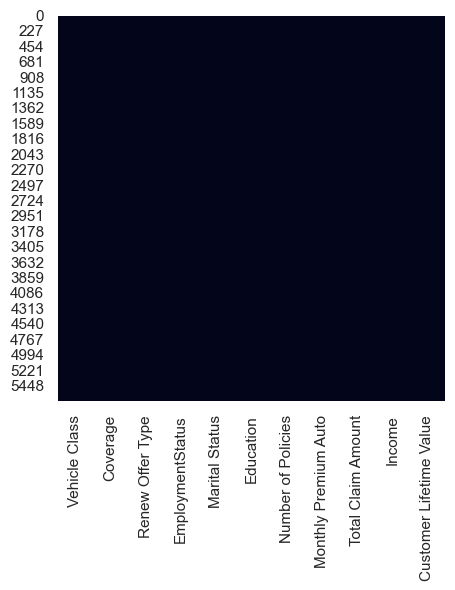

In [88]:
# cek missing value dengan heatmap
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

<Figure size 1000x600 with 0 Axes>

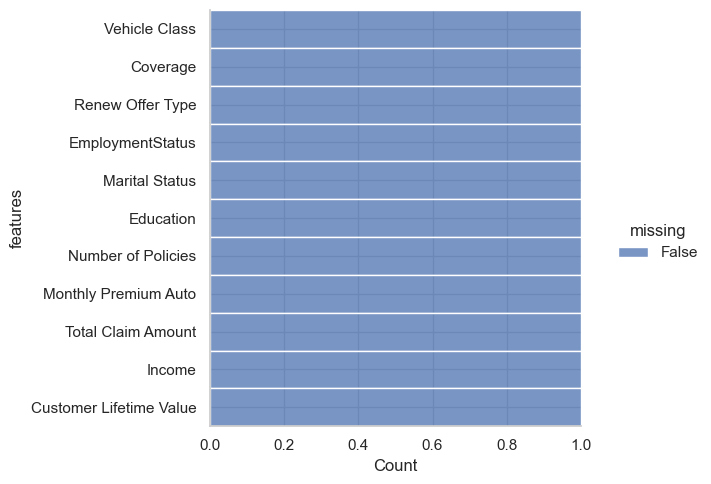

In [89]:
plt.figure(figsize=(10,6))
ax = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

ax.set(ylabel='features')
plt.show()

In [90]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [91]:
df.duplicated().sum()

618

Kesimpulan :

- Semua fitur memiliki kepentingan untuk analisis prediktif, karena itu tidak perlu melakukan drop kolom.
- Dataset ini tidak memiliki missing Value
- Dataset ini memiliki 618 Duplicate data, namun dataset ini tidak memiliki baris unique id atau primary key atau kolom datetime, karena itu kita asumsikan dataset ini dataset ini tidak memiliki duplicate data

###  **3.2. Check Outlier**

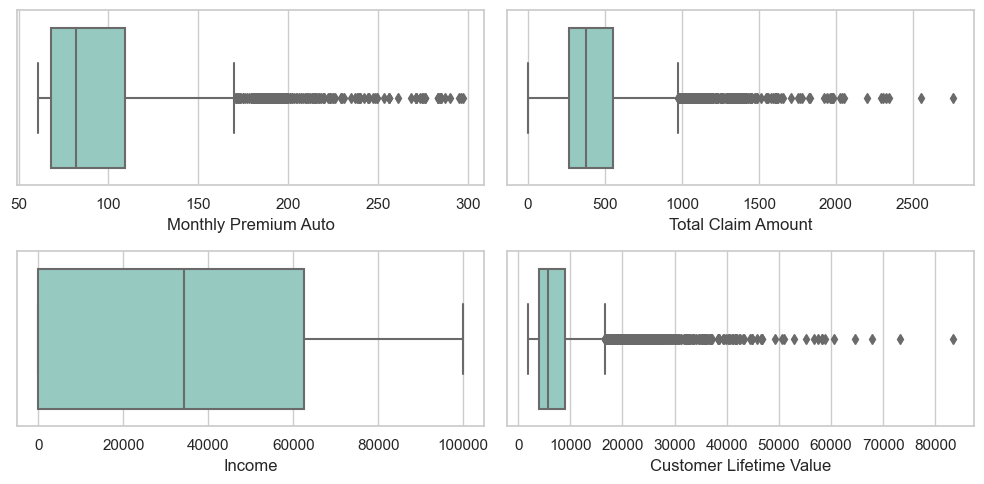

In [92]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature.remove('Number of Policies')

plt.figure(figsize=(10, 5), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxplot(x=feature, data=df)
    plt.tight_layout()
    plotnumber += 1

**Kesimpulan :**

- Terdapat Outlier pada Feature Monthly Premium Auto, Total Claim Amount, dan Customer LifeTime Value

## **4. EDA**
---

In [93]:
# checking and create number columns in the data 
num_col = [col for col in df.columns if df[col].dtype == "float64" ] + [col for col in df.columns if df[col].dtype == "int64" ]
num_col

['Number of Policies',
 'Monthly Premium Auto',
 'Total Claim Amount',
 'Income',
 'Customer Lifetime Value']

In [94]:
# checking and create categorical columns in the data 
cat_col = [col for col in df.columns if df[col].dtype == "object" ]
cat_col

['Vehicle Class',
 'Coverage',
 'Renew Offer Type',
 'EmploymentStatus',
 'Marital Status',
 'Education']

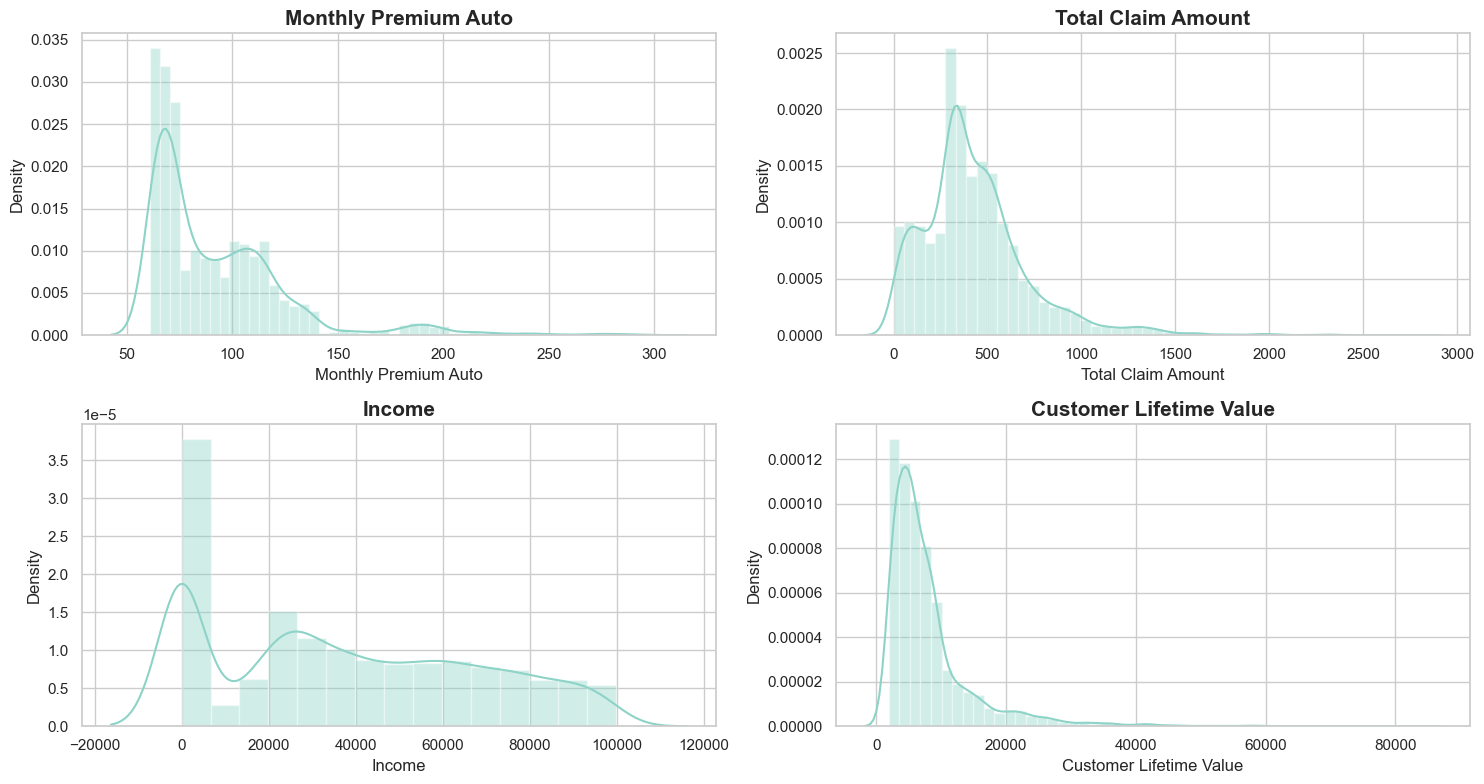

In [95]:
num_col1 = num_col.copy()
num_col1.remove('Number of Policies')

fig = plt.figure(figsize = (15,8))
for i in range(0, len(num_col1)):
    plt.subplot(2, 2, i+1)
    sns.distplot(df[num_col1[i]])
    plt.title(num_col1[i], size=15, weight='bold')
    plt.tight_layout()

**Kesimpulan :**

Berdasarkan plot distribusi pada fitur-fitur yang ada di dataset, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada CLV, Income, Total Claim Amount, Monthly Premium Auto.

**Problem :**
- bayak customer memiliki clv kurang dari 20.000

**Solusion :**
- menggeser distribusi CLV menjadi normal dengan cara membuat model ML predik CLV dan menggunakannya untuk strategi bisnis untuk cross selling dan up selling

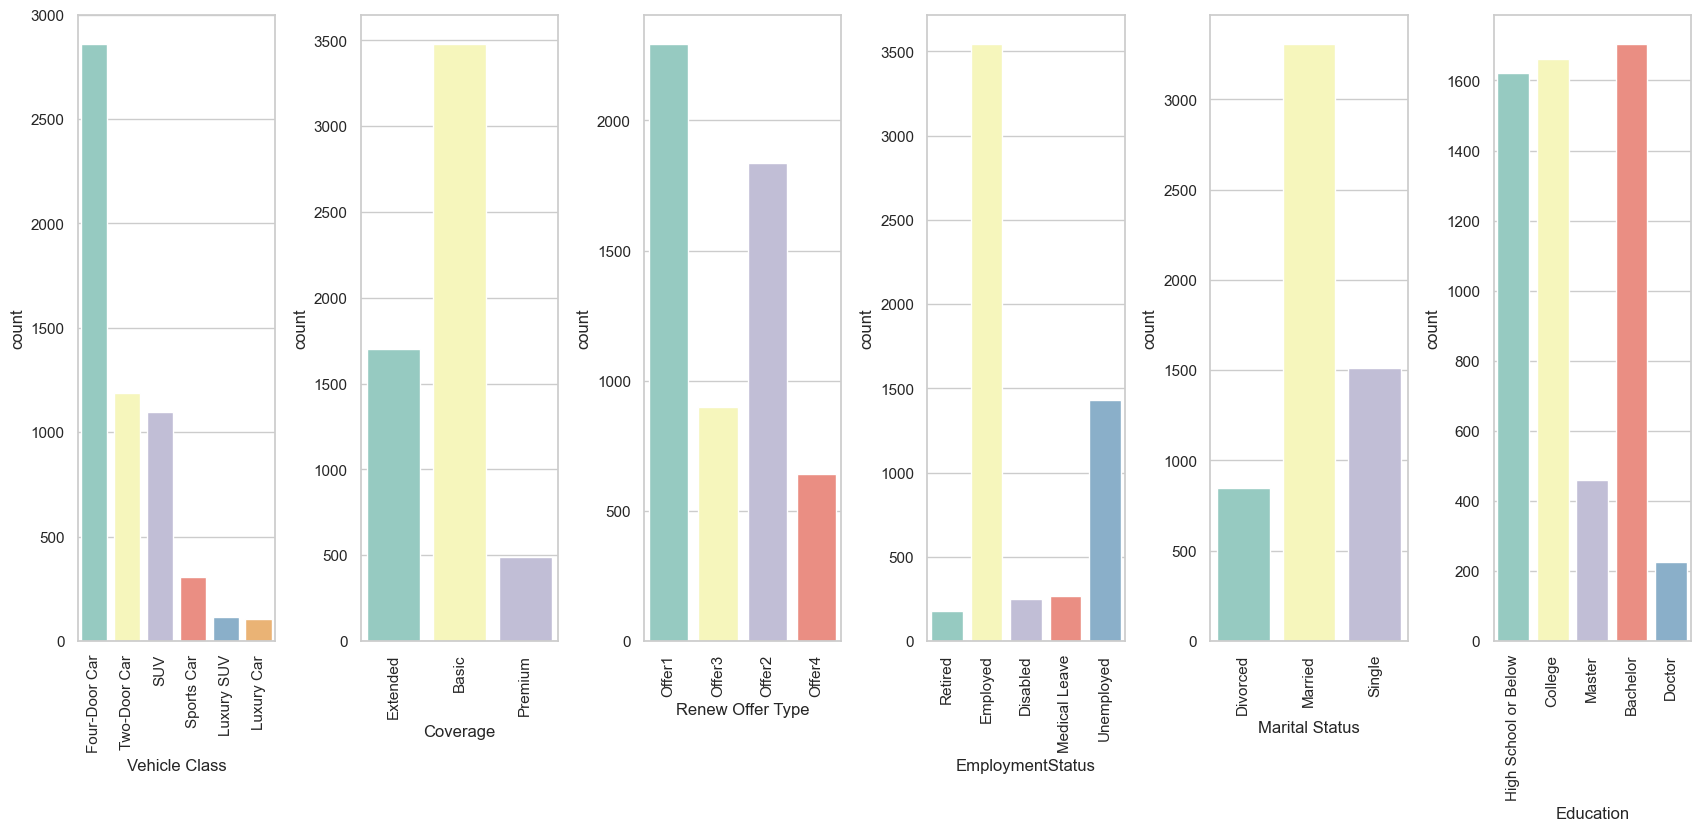

In [96]:
fig = plt.figure(figsize = (20,8)) #image size
for i in range(0, len(cat_col)): 
    plt.subplot(1, 7, i+1) #total chart 
    sns.countplot(x = df[cat_col[i]]) #chart type
    plt.tight_layout() #print chart
    x=plt.xticks(rotation=90) #rotation the value name

**kesimpulan :**

- customer dengan eduction dibawah master memiliki jumblah yang sangat banyak 
- customer dengan status married lebih banyak dari pada single dan divorced
- customer dengan status employed memiliki jumblah sangat banyak diantara yang lainnya
- unemployed berada di posisi kedua setelah employed
- semakin banyak renew offer type semakin berkurang juga jumblah customernya

In [97]:
df_edu_claim = df[['Education','Total Claim Amount']].groupby('Education').median().reset_index().sort_values('Total Claim Amount')
df_edu_claim

,Education,Total Claim Amount
4,Master,316.800000
2,Doctor,330.669166
0,Bachelor,364.800000
1,College,365.182168
3,High School or Below,446.400000


### **4.1 Education**

<Axes: xlabel='Education', ylabel='Total Claim Amount'>

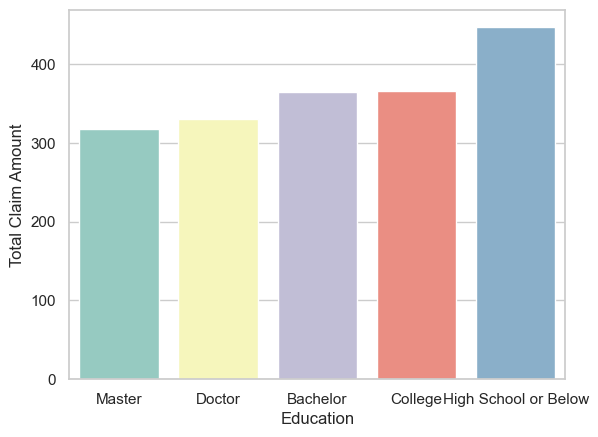

In [98]:

sns.barplot(data=df_edu_claim, x='Education', y='Total Claim Amount' )

- semakin rendah tingkat education maka semakin tinggi customer melakukan claim 

In [99]:
coverage_premi = df[['Monthly Premium Auto','Coverage']].groupby('Coverage').median().reset_index().sort_values('Monthly Premium Auto')
coverage_premi

,Coverage,Monthly Premium Auto
0,Basic,70.0
1,Extended,92.0
2,Premium,114.0


### **4.2 CLV_Range** 

In [100]:
# Membuat range pembagian
bins = [0, 20000, 40000, 60000, float('inf')]  # Inf untuk nilai tak terhingga
labels = ['0-20000', '20001-40000', '40001-60000', '>60000']

# kolom baru CLV_Range
df['CLV_Range'] = pd.cut(df['Customer Lifetime Value'], bins=bins, labels=labels, right=False)

In [101]:
df[['CLV_Range','Total Claim Amount']].groupby('CLV_Range').median().reset_index()

,CLV_Range,Total Claim Amount
0,0-20000,374.400000
1,20001-40000,451.475777
2,40001-60000,631.200000
3,>60000,979.200000


In [102]:
df[['CLV_Range','Monthly Premium Auto']].groupby('CLV_Range').median().reset_index()

,CLV_Range,Monthly Premium Auto
0,0-20000,80.0
1,20001-40000,100.5
2,40001-60000,135.0
3,>60000,204.0


In [103]:
df[['CLV_Range','Number of Policies']].groupby('CLV_Range').mean().reset_index()

,CLV_Range,Number of Policies
0,0-20000,3.042232
1,20001-40000,2.074074
2,40001-60000,2.000000
3,>60000,2.000000


In [104]:
df[['CLV_Range','Income']].groupby('CLV_Range').median().reset_index()

,CLV_Range,Income
0,0-20000,34336.0
1,20001-40000,33190.0
2,40001-60000,46587.0
3,>60000,39547.0


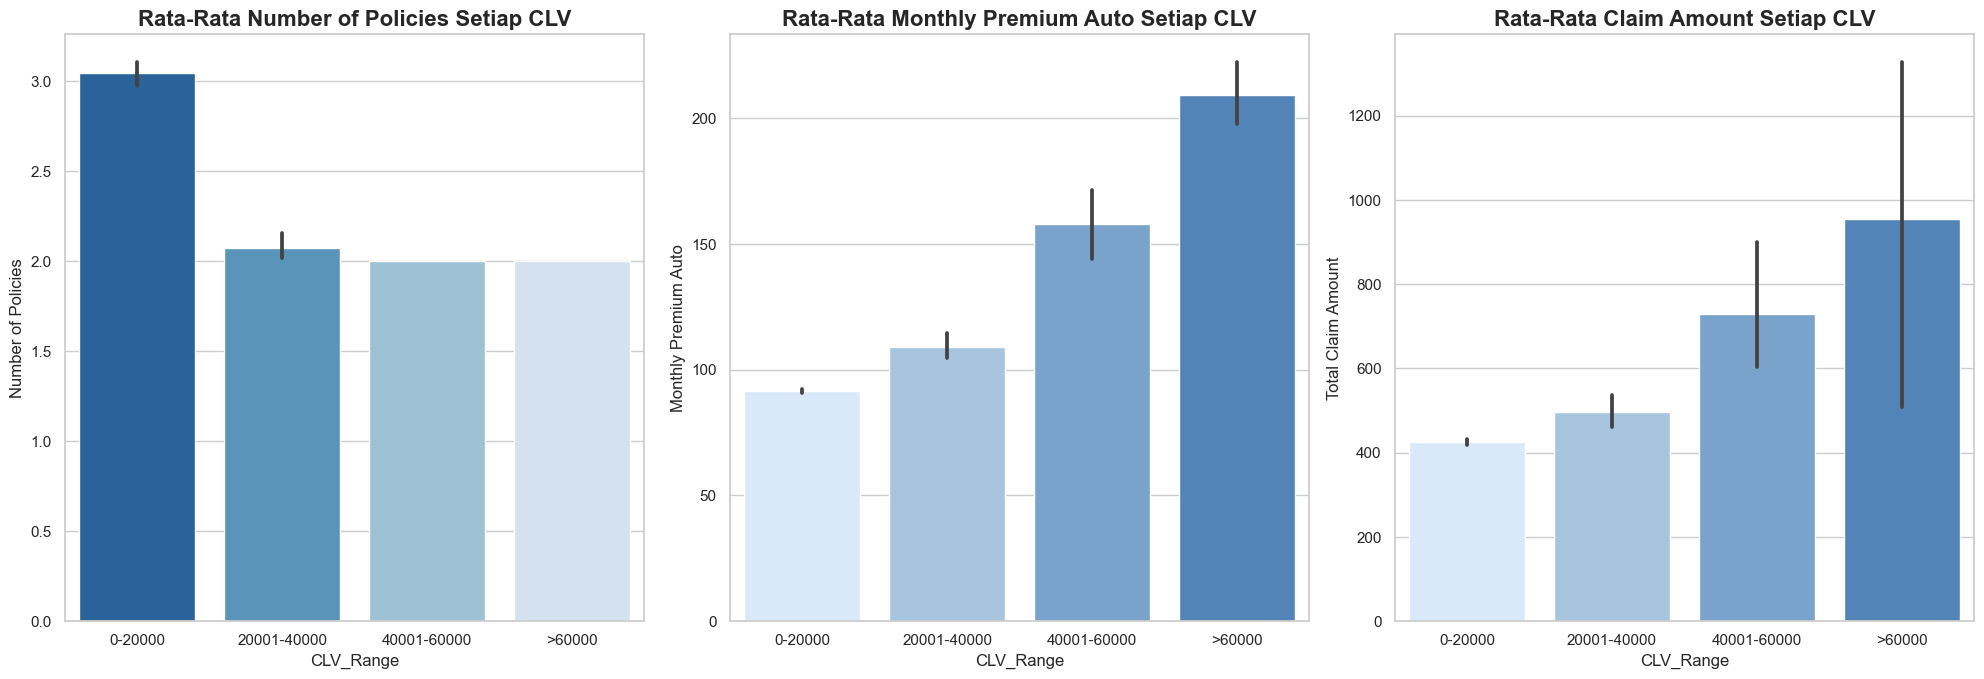

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar warna yang sesuai dengan urutan nilai
colors = ["#D5E8FF", "#9FC5E8", "#6BA4D8", "#4284C8", "#1F63B2", "#084DA0", "#053C88"]

fig = plt.figure(figsize=(20, 13))

plt.subplot(231)
sns.barplot(data=df, x='CLV_Range', y='Number of Policies', palette='Blues_r')
plt.title('Rata-Rata Number of Policies Setiap CLV', fontsize=16, fontweight='bold')

plt.subplot(232)
sns.barplot(data=df, x='CLV_Range', y='Monthly Premium Auto', palette=colors)
plt.title('Rata-Rata Monthly Premium Auto Setiap CLV', fontsize=16, fontweight='bold')

plt.subplot(233)
sns.barplot(data=df, x='CLV_Range', y='Total Claim Amount', palette=colors)
plt.title('Rata-Rata Claim Amount Setiap CLV', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


**Kesimpulan :**

- Terlihat rata-rata customer yang paling banyak memiliki polis berada di range clv = 0-20000
- Temakin tinggi CLV semakin tinggi juga Customer membayar premi setiap bulannya
- Semakin tinggi CLV semakin tinggi juga rata rata Customer yang klaim asuransi

### **4.3 Unemployed** 

In [106]:
df_employed_claim = df[['EmploymentStatus','Total Claim Amount']].groupby('EmploymentStatus').sum().reset_index()
df_employed_claim

,EmploymentStatus,Total Claim Amount
0,Disabled,1.194645e+05
1,Employed,1.264132e+06
2,Medical Leave,1.208272e+05
3,Retired,9.011288e+04
4,Unemployed,8.511101e+05


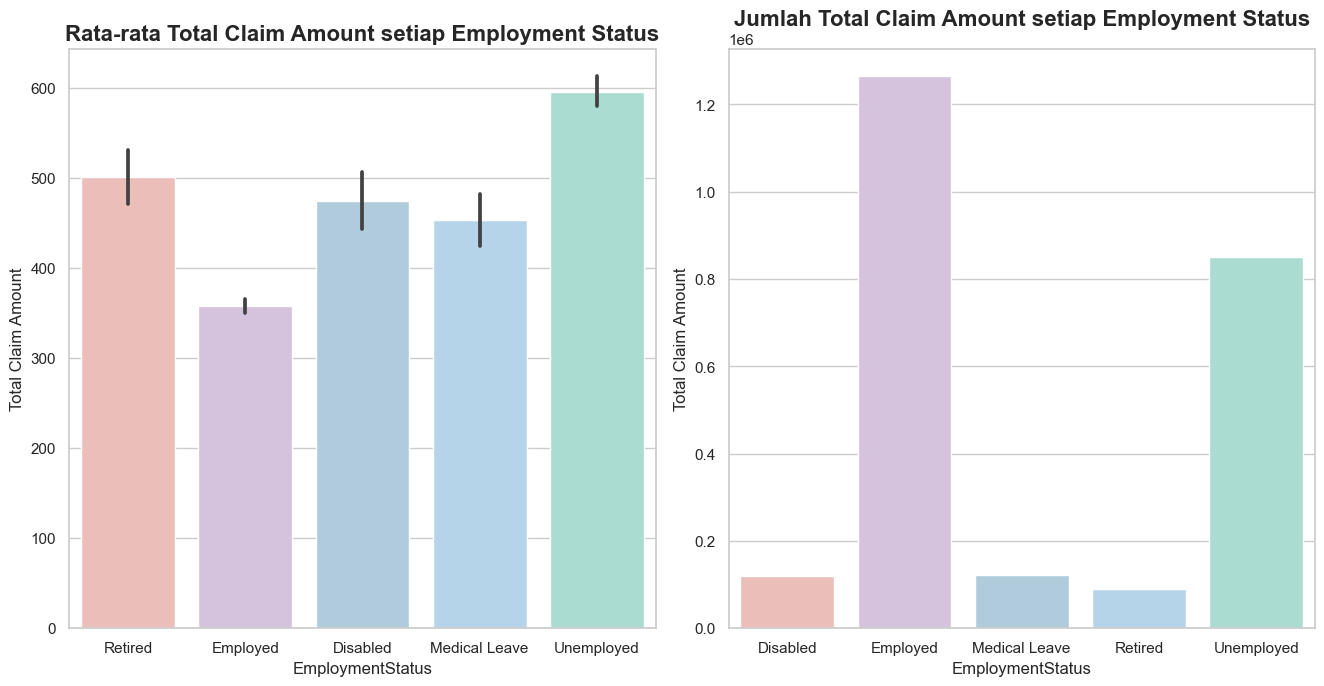

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar warna muda yang sesuai dengan urutan kategori
palette = ["#F5B7B1", "#D7BDE2", "#A9CCE3", "#AED6F1", "#A3E4D7", "#F9E79F", "#FAD7A0"]

fig = plt.figure(figsize=(20, 13))

plt.subplot(231)
sns.barplot(data=df, x='EmploymentStatus', y='Total Claim Amount', palette=palette)
plt.title('Rata-rata Total Claim Amount setiap Employment Status', fontsize=16, fontweight='bold')

plt.subplot(232)
sns.barplot(data=df_employed_claim, x='EmploymentStatus', y='Total Claim Amount', palette=palette)
plt.title('Jumlah Total Claim Amount setiap Employment Status', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


- Terlihat Customer dengan status tidak bekerja memiliki rata-rata total claim terbesar
- dan memiliki jumblah total klaim terbesar kedua setelah Employed

### **4.4 Klaim amount**

In [108]:
df_claim_cov = df[['Total Claim Amount','Coverage']].groupby('Coverage').median().reset_index()
df_claim_cov

,Coverage,Total Claim Amount
0,Basic,333.696228
1,Extended,442.341034
2,Premium,556.800000


Text(0.5, 1.0, 'Coverage vs Total Claim Amount')

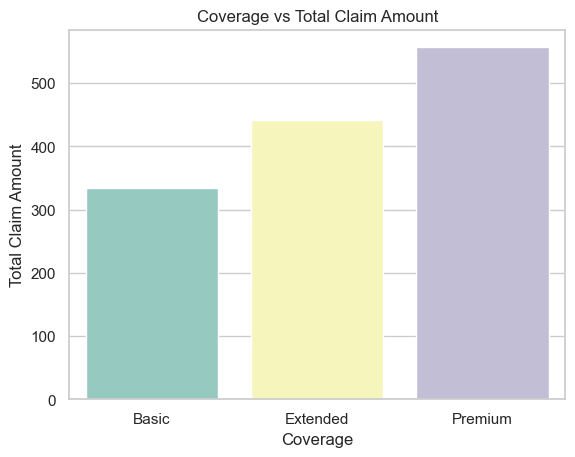

In [109]:
sns.barplot(data=df_claim_cov, x='Coverage', y='Total Claim Amount')
plt.title('Coverage vs Total Claim Amount')

In [110]:
df_claim_edu = df[['Total Claim Amount','Education']].groupby('Education').median().reset_index().sort_values('Total Claim Amount',ascending=False)
df_claim_edu

,Education,Total Claim Amount
3,High School or Below,446.400000
1,College,365.182168
0,Bachelor,364.800000
2,Doctor,330.669166
4,Master,316.800000


Text(0.5, 1.0, 'Education vs Total Claim Amount')

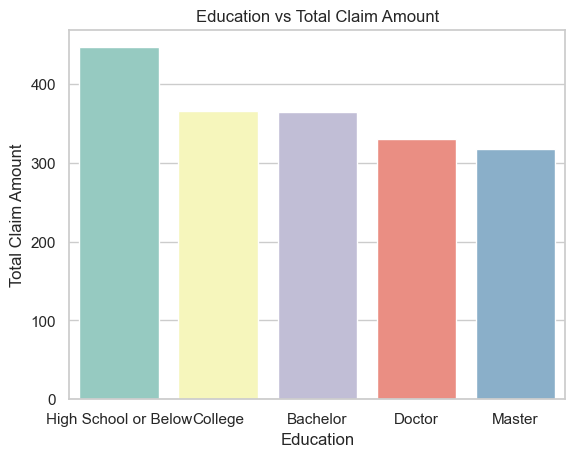

In [111]:
sns.barplot(data=df_claim_edu, x='Education', y='Total Claim Amount')
plt.title('Education vs Total Claim Amount')

- Semakin tinggi pendidikan, makan total klaim semakin menurun

In [112]:
df_claim_status = df[['Total Claim Amount','Marital Status']].groupby('Marital Status').median().reset_index()
df_claim_status

,Marital Status,Total Claim Amount
0,Divorced,355.2
1,Married,345.6
2,Single,496.8


Text(0.5, 1.0, 'Marital Status vs Total Claim Amount')

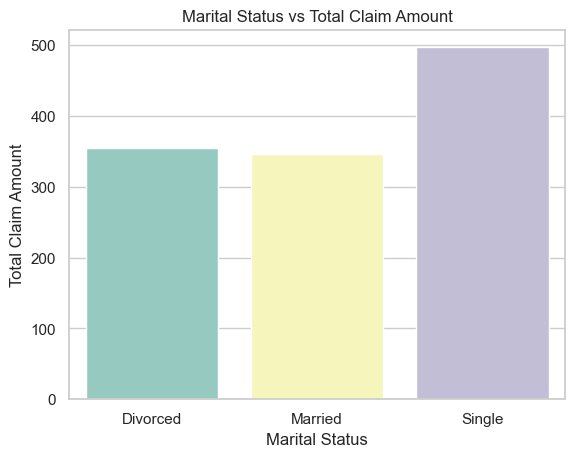

In [113]:
sns.barplot(data=df_claim_status, x='Marital Status', y='Total Claim Amount')
plt.title('Marital Status vs Total Claim Amount')

- customer yang memiliki status single lebih banyak jumblah klaim asuransi'nya

In [114]:
df_claim_emp_stat = df[['Total Claim Amount','EmploymentStatus']].groupby('EmploymentStatus').median().sort_values('Total Claim Amount',ascending=False).reset_index()
df_claim_emp_stat

,EmploymentStatus,Total Claim Amount
0,Unemployed,525.600000
1,Retired,468.000000
2,Disabled,439.694806
3,Medical Leave,398.502948
4,Employed,326.400000


Text(0.5, 1.0, 'EmploymentStatus vs Total Claim Amount')

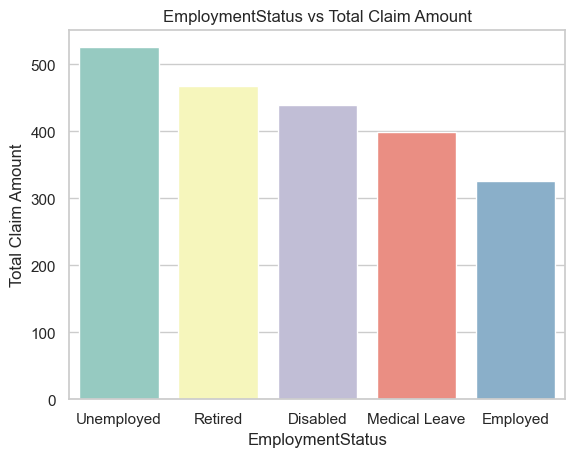

In [115]:
sns.barplot(data=df_claim_emp_stat, x='EmploymentStatus', y='Total Claim Amount')
plt.title('EmploymentStatus vs Total Claim Amount')

- customer dengan status sedang bekerja memiliki klaim paling sedikit, sebaliknya customer dengan status tidak sedang bekerja memiliki klaim paling banyak

recommendasion :
- kita bisa memfokuskan

### Monthly Premium Auto

In [116]:
df.sample()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,CLV_Range
3351,Four-Door Car,Basic,Offer1,Unemployed,Single,Bachelor,3.0,68.0,326.4,0.0,4566.123651,0-20000


In [117]:
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car,..."
1,Coverage,object,0,0.0,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,0,0.0,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,object,0,0.0,5,"[Retired, Employed, Disabled, Medical Leave, U..."
4,Marital Status,object,0,0.0,3,"[Divorced, Married, Single]"
5,Education,object,0,0.0,5,"[High School or Below, College, Master, Bachel..."
6,Number of Policies,float64,0,0.0,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, ..."
8,Total Claim Amount,float64,0,0.0,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355..."
9,Income,float64,0,0.0,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, ..."


In [118]:
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


## **5. Data Preprocessing Model**
---

Sebelum dataset di modelling dataset perlu untuk di processing dengan membuang Outlier agar hasil prediksi model menjadi lebih baik

### **5.1 Hendle Outlier**

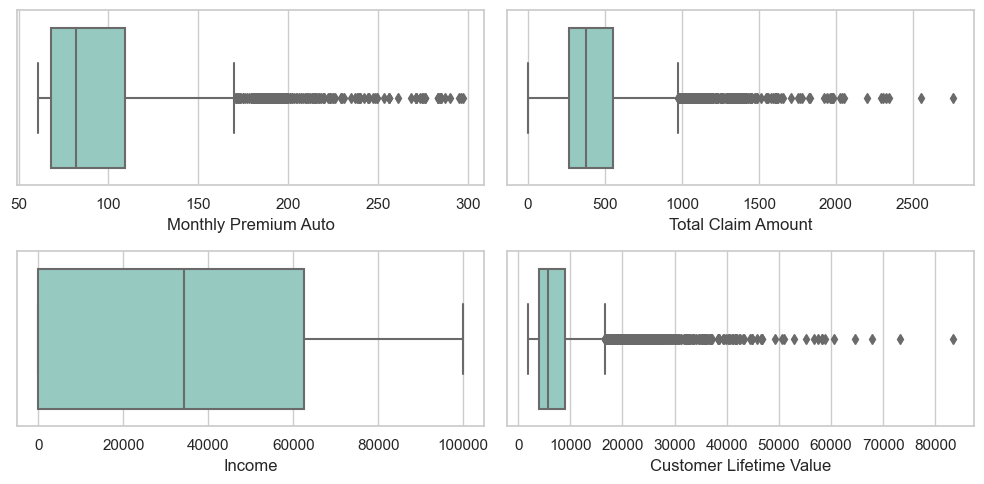

In [119]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature.remove('Number of Policies')

plt.figure(figsize=(10, 5), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxplot(x=feature, data=df)
    plt.tight_layout()
    plotnumber += 1

**Kesimpulan :**

- Outlier pada CLV akan dihapus berdasarkan nilai IQRnya, untuk membuat model dapat memberikan hasil prediksi terbaiknya
- Disisi lain Outlayer pada CLV kita hapus karena kita ingin memfokuskan diri pada customer dengan clv <20000 agar kita bisa melakukan up selling atau cross selling untuk menaikan income dan profit perusahaan
- Untuk Outlier feature Total Klaim Amount, dan Monthly Premium Auto juga akan dihapus memakai batasan IQR karena berdasarkan EDA semakin tinggi CLV semakin tinggi juga Total Klaim Amount, dan Monthly Premi Auto (bisa dilihat pada grafik di bawah)

Text(0.5, 1.0, 'CLV_Range vs Total Claim Amount')

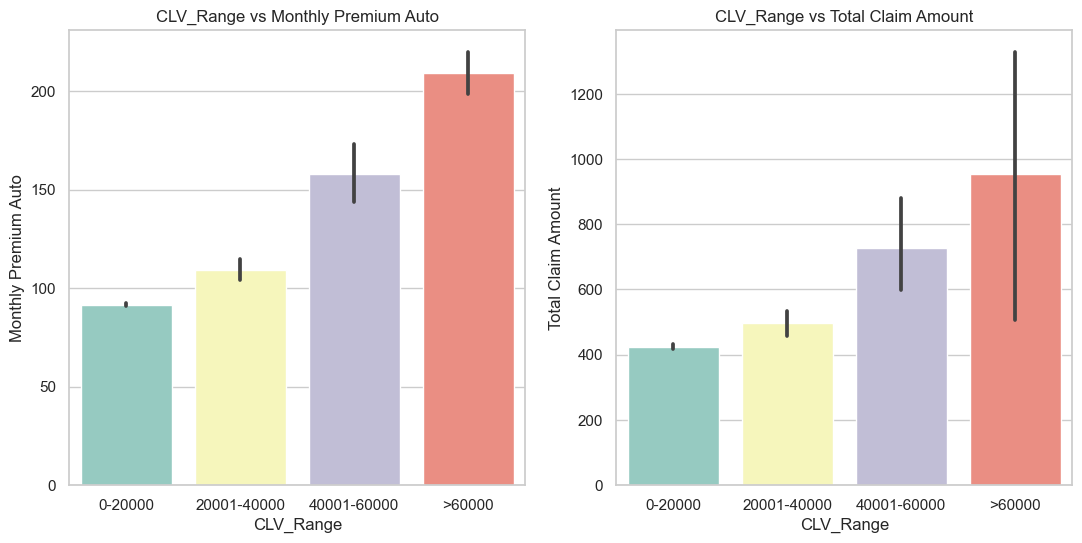

In [120]:
fig = plt.figure(figsize=(20,13))

plt.subplot(231)
sns.barplot(data=df, x='CLV_Range', y='Monthly Premium Auto')
plt.title('CLV_Range vs Monthly Premium Auto')

plt.subplot(232)
sns.barplot(data=df, x='CLV_Range', y='Total Claim Amount')
plt.title('CLV_Range vs Total Claim Amount')

**Outlier Customer Lifetime Value**

In [121]:
# Fungsi untuk mengecek IQR dan limit
def limit(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')    

In [122]:
limit(df_model['Customer Lifetime Value'])

IQR: 5076.870325
limit_bawah: -3660.9609535
limit_atas: 16646.5203465


In [123]:
df_model[df_model['Customer Lifetime Value'] > 16646.5203465].count()['Customer Lifetime Value']

499

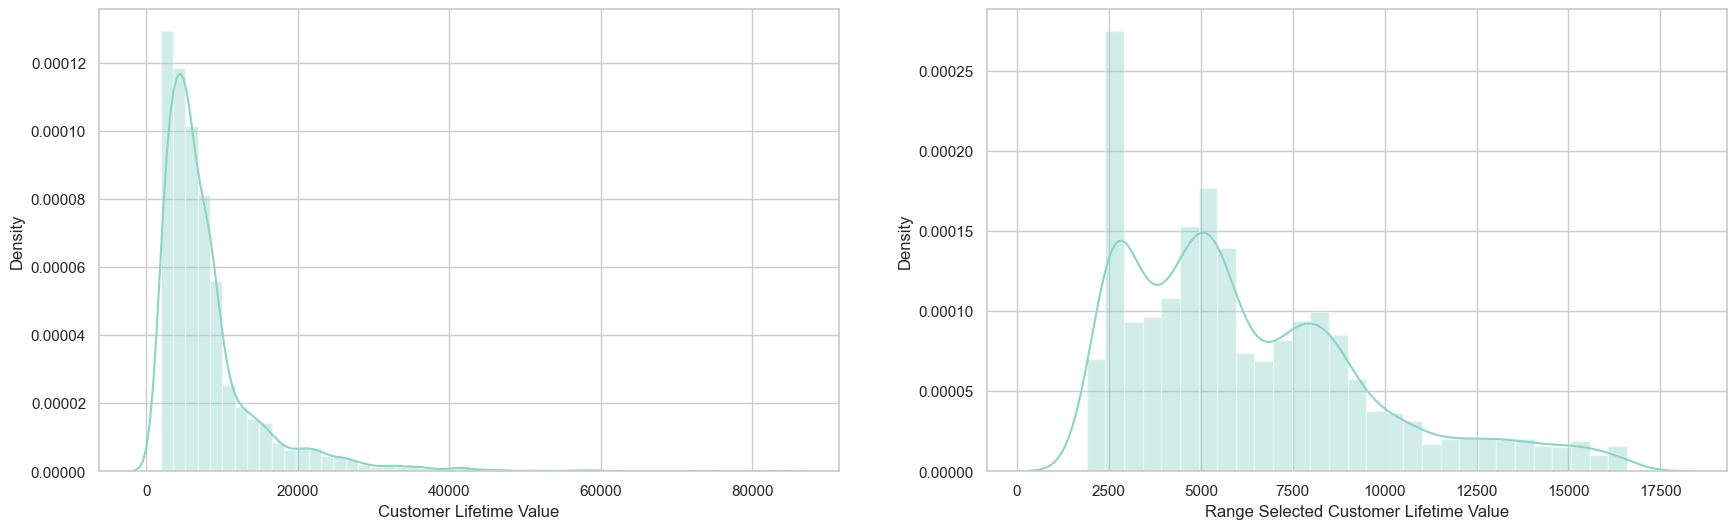

In [124]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Customer Lifetime Value'] <= 16646.5203465)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Customer Lifetime Value'], ax=axes[0])
sns.distplot(df_model['Customer Lifetime Value'], ax=axes[1])
axes[0].set_xlabel('Customer Lifetime Value')
axes[1].set_xlabel('Range Selected Customer Lifetime Value')
plt.show()

**Outlier Total Claim Amount**

In [125]:
limit(df_model['Total Claim Amount'])

IQR: 276.25013025
limit_bawah: -148.22532562499998
limit_atas: 956.775195375


In [126]:
df_model[df_model['Total Claim Amount'] > 974.566507].count()['Total Claim Amount']

197

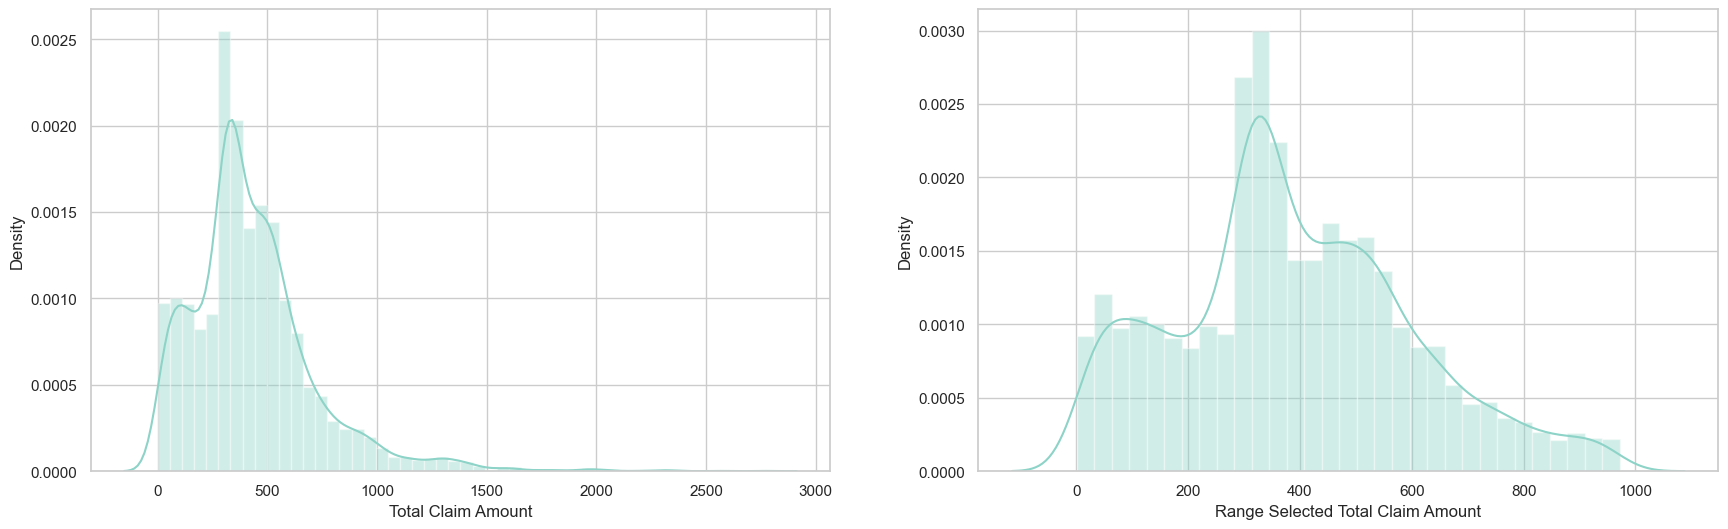

In [127]:
# Melakukan filtering pada data
df_model = df_model[(df_model['Total Claim Amount'] <= 974.566507)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Total Claim Amount'], ax=axes[0])
sns.distplot(df_model['Total Claim Amount'], ax=axes[1])
axes[0].set_xlabel('Total Claim Amount')
axes[1].set_xlabel('Range Selected Total Claim Amount')
plt.show()

In [128]:
limit(df_model['Monthly Premium Auto'])

IQR: 37.0
limit_bawah: 12.5
limit_atas: 160.5


In [129]:
df_model[df_model['Monthly Premium Auto'] > 163.0].count()['Monthly Premium Auto']

102

**Setelah di model dilatih berulangkali, Model mendapatkan hasil prediksi terbaiknya ketika Outlier dari Monthly Premium Auto tidak dihapus, maka dengan alasan itu Outlier pada Monthly Premium Auto tidak dihapus.**

### **5.2 Cleaned Dataset**

In [130]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4973 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4973 non-null   object 
 1   Coverage                 4973 non-null   object 
 2   Renew Offer Type         4973 non-null   object 
 3   EmploymentStatus         4973 non-null   object 
 4   Marital Status           4973 non-null   object 
 5   Education                4973 non-null   object 
 6   Number of Policies       4973 non-null   float64
 7   Monthly Premium Auto     4973 non-null   float64
 8   Total Claim Amount       4973 non-null   float64
 9   Income                   4973 non-null   float64
 10  Customer Lifetime Value  4973 non-null   float64
dtypes: float64(5), object(6)
memory usage: 466.2+ KB


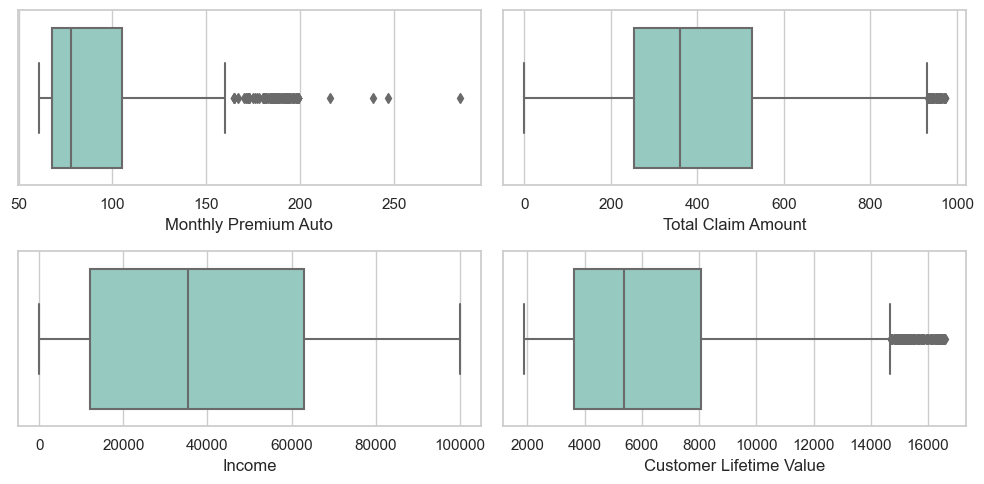

In [131]:
# Numerical Features
num_feature = [fea for fea in df_model.describe().columns]
num_feature.remove('Number of Policies')

plt.figure(figsize=(10, 5), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxplot(x=feature, data=df_model)
    plt.tight_layout()
    plotnumber += 1

# **6. Modelling**

In [132]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error

In [133]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

### **6.1. Encoding**

Agar model ML bisa mempelajari data maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [134]:
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car,..."
1,Coverage,object,0,0.0,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,0,0.0,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,object,0,0.0,5,"[Retired, Employed, Disabled, Medical Leave, U..."
4,Marital Status,object,0,0.0,3,"[Divorced, Married, Single]"
5,Education,object,0,0.0,5,"[High School or Below, College, Master, Bachel..."
6,Number of Policies,float64,0,0.0,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, ..."
8,Total Claim Amount,float64,0,0.0,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355..."
9,Income,float64,0,0.0,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, ..."


**Menentukan jenis feature tranform :**
- Vehicle Class = Ordinal
- Coverage = Ordinal
- Renew Offer Type = ordinal
- EmploymentStatus = ordonal
- Marital Status = one hot
- Education = ordinal
- Number of Policies = robust
- Monthly Premium Auto = robust
- Total Claim Amount = robust
- Income = robust


In [135]:
# memberikan nama kolom ordinal menjadi numerical

ordinal_mapping = [
    {'col':'Vehicle Class', 'mapping':{'Two-Door Car':0, 'Four-Door Car':1, 'Sports Car':2, 'SUV':3, 'Luxury SUV':4, 'Luxury Car':5}},
    {'col':'Coverage', 'mapping':{'Basic':0, 'Extended':2, 'Premium':3 }},
    {'col':'Renew Offer Type', 'mapping':{'Offer1':0, 'Offer2':1, 'Offer3':2, 'Offer4':3}},
    {'col':'EmploymentStatus', 'mapping':{'Disabled':0, 'Medical Leave':1, 'Unemployed':2, 'Employed':3, 'Retired':4}},
    {'col':'Education', 'mapping':{'High School or Below':0, 'College':1, 'Bachelor':2, 'Master':3, 'Doctor':4}}
] 

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['Vehicle Class','Coverage','Renew Offer Type','EmploymentStatus','Education'], mapping=ordinal_mapping)),
    ('scaler', RobustScaler())
])

In [136]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['Vehicle Class','Coverage','Renew Offer Type','EmploymentStatus','Education']),
    ('onehot', OneHotEncoder(drop='first'), ['Marital Status']),
    ('robust', RobustScaler(), ['Number of Policies', 'Monthly Premium Auto','Total Claim Amount','Income'])
], remainder='passthrough')

In [137]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['Vehicle '
                                                                       'Class',
                                                                       'Coverage',
                                                                       'Renew '
                                                                       'Offer '
                                                                       'Type',
                                                                       'EmploymentStatus',
                                                                       'Education'],
                                                                 mapping=[{'col': 'Vehicle '
                                                                                  'Class',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Two-Door Car     0
Four-Door Car    1
Sports Car       2
SUV              3
Luxury SUV       4
Luxury Car       5
dtype: int64},
                                                                          {'col...
                                                                           'data_type': dtype('O'),
                                                                           'mapping': High School or Below    0
College                 1
Bachelor                2
Master                  3
Doctor                  4
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['Vehicle Class', 'Coverage',
                                  'Renew Offer Type', 'EmploymentStatus',
                                  'Education']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Marital Status']),
                                ('robust', RobustScaler(),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income'])])

### **6.2. Data Splitting**

In [138]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['Customer Lifetime Value'], axis=1)
y = df_model['Customer Lifetime Value']

**Train and Test Splitting**

In [139]:
# Splitting data training dan test dengan proporsi 75:25
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.25,
    random_state=1)

### **6.3. Choose a Benchmark Model**

In [140]:
# Define algoritma yang digunakan

lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
gb = GradientBoostingRegressor(random_state=1)
cat = CatBoostRegressor(random_state=1, verbose=False)
ab = AdaBoostRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_cat = TransformedTargetRegressor(cat, func=np.log, inverse_func=np.exp)
log_ab = TransformedTargetRegressor(ab, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_xgb, log_rf, log_gb, log_cat, log_ab]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_msle = []
nilai_mean_msle = []
nilai_std_msle = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

# Mencari algoritma terbaik berdasarkan metrik
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())


    # R-Square
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2'
        )

    print(model_cv_r2, i)
    
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

[-2939.38531071 -3305.8008378  -2910.35610138 -2805.4540413
 -2736.31116386] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2038.40394538 -2322.69751316 -2076.02946701 -1977.46712158
 -1959.66300089] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.32247025 -0.33833324 -0.34021096 -0.33452284 -0.33813271] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.17358719 0.13114906 0.23319526 0.20372295 0.25937579] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2765.08652715 -3058.14910015 -2733.56295368 -2644.18778774
 -2466.7123942 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighbo

In [141]:
# Evaluasi hasil dari 5 model
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'XGBoost Regressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'CatBoostRegressor','AdaBoostRegressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Mean_R2': nilai_mean_r2,
    'Std_R2' : nilai_std_r2
}).sort_values('Mean_MAE', ascending=False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
4,RandomForestRegressor,-926.849038,102.663559,-339.340248,43.264615,-0.040633,0.004037,0.919973,0.013460
6,CatBoostRegressor,-900.621982,84.227082,-341.068302,37.577492,-0.041719,0.003177,0.924477,0.011357
5,GradientBoostingRegressor,-913.020153,80.318101,-356.727704,37.161377,-0.042557,0.002951,0.922551,0.009930
3,XGBoost Regressor,-921.422734,86.725905,-366.087215,37.631729,-0.047101,0.003220,0.920888,0.012367
2,DecisionTree Regressor,-1290.125417,58.528388,-428.577411,30.892381,-0.052712,0.003807,0.845478,0.010263
7,AdaBoostRegressor,-1284.018214,52.076824,-786.397341,33.913899,-0.109153,0.002967,0.847059,0.007005
1,KNN Regressor,-2733.539753,192.638024,-1761.681001,128.342583,-0.289352,0.003526,0.307887,0.050602
0,Linear Regression,-2939.461491,197.119100,-2074.852210,130.774283,-0.334734,0.006402,0.200206,0.044898


Kesimpulan : 

Berdasarkan evaluasi performa di atas, model RandomForestRegressor menunjukkan kinerja yang paling baik secara konsisten, dengan nilai RMSE (-926.84), MAE (-339.34), MAPE(-0.04), dan R2 (0.91) yang lebih baik daripada model lainnya, diikuti dengan model, Cat Boost Regressor, Gradient Boosting Regressor, XGBoost Regressor . 

Kita akan memakai 4 model teratas untuk dilatih dan dituning modelnya lalu dibandingkan dengan model lainnya (Untuk hasi perbandingan akan dijelaskan pada grafik sebelum kesimpulan yaitu Perbandingan CLV actual dengan CLV hasil prediksi model). Dan didapatkan model Model XGBoost Regressor dapat memberikan performa yang lebih baik dari pada model lainnya. Maka Dari 

Model XGBoost Regressor dapat memberikan performa yang lebih baik karena kemampuannya dalam menangani non-linearitas, interaksi antara fitur, dan pengurangan kesalahan dengan menggunakan teknik gradient boosting. Selain itu, XGBoost Regressor telah terbukti efektif dalam berbagai kompetisi dan aplikasi di dunia nyata.

### **6.4. Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost

In [142]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))


score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape, 'R2': score_r2}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE,R2
XGB,798.142911,348.005134,0.051621,0.936714


### **6.5. Hyperparameter Tuning**

Kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [143]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [144]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [145]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_ordinal_scale',
                                                                               Pipeline(steps=[('ordinal',
                                                                                                OrdinalEncoder(cols=['Vehicle '
                                                                                                                     'Class',
                                                                                                                     'Coverage',
                                                                                                                     'Renew '
                                                                                                                     'Offer '
                                                                                                                     'Type',
                                                                                                                     'EmploymentStatus',
                                                                                                                     'Education'],
                                                                                                               mapping=[{'col': 'Vehicle '
                                                                                                                                'Class'...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [146]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,1.192280,0.034884,0.033739,0.003137,0.6,0.001,190,5,0.04,9,0.9,"{'model__subsample': 0.6, 'model__reg_alpha': ...",-915.839065,-1007.943060,-904.920886,-932.359951,-747.622701,-901.737133,85.061995,1,-399.910443,-428.373529,-366.224892,-355.838114,-309.626906,-371.994777,40.353262,1,-0.051972,-0.052334,-0.046891,-0.045484,-0.042565,-0.047849,0.003783,1
7,1.092343,0.021211,0.041664,0.003171,0.9,0.059948,119,8,0.05,5,0.8,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-944.127207,-1007.472041,-929.334233,-989.267930,-762.291962,-926.498674,86.924468,2,-411.113451,-438.400803,-375.774405,-376.529131,-307.587565,-381.881071,43.896405,2,-0.055423,-0.054867,-0.050218,-0.050001,-0.042702,-0.050642,0.004568,2
24,0.529405,0.013513,0.032601,0.001190,0.9,10.0,146,4,0.06,5,0.4,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-943.194526,-1019.785199,-943.562586,-957.399852,-812.588976,-935.306228,67.549598,3,-452.013053,-484.247787,-428.280835,-420.245881,-389.842632,-434.926038,31.675796,3,-0.060271,-0.061870,-0.057432,-0.058235,-0.055899,-0.058741,0.002106,3
22,0.524204,0.013970,0.034245,0.003114,0.7,0.002783,155,4,0.25,8,0.3,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-963.439723,-1041.868246,-984.289101,-973.472665,-830.423846,-958.698716,69.666674,4,-520.355698,-548.554248,-495.953337,-471.729717,-442.848529,-495.888306,36.794604,6,-0.079409,-0.080082,-0.075825,-0.074265,-0.074438,-0.076804,0.002471,5
23,0.492257,0.019335,0.033602,0.003200,0.9,3.593814,153,4,0.33,9,0.3,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-966.219407,-1049.795259,-958.323135,-977.171535,-847.904118,-959.882691,64.753318,5,-506.803252,-542.434651,-468.080369,-465.198799,-446.736902,-485.850795,34.388742,4,-0.079169,-0.078080,-0.070308,-0.071369,-0.074992,-0.074784,0.003516,4


In [147]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -901.7371327319582
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


### **6.6. Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [148]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R2': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE,R2
XGB,770.474994,310.04837,0.039907,0.941025


**Performance Comparison**

**Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.**

In [149]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE,R2
XGB,798.142911,348.005134,0.051621,0.936714


In [150]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE,R2
XGB,770.474994,310.04837,0.039907,0.941025


Kesimpulan :
- Model mengalami peningkatan performa (nilai RMSE, MAE, MAPE berkurang) dengan dilakukannya hyperparameter tuning.

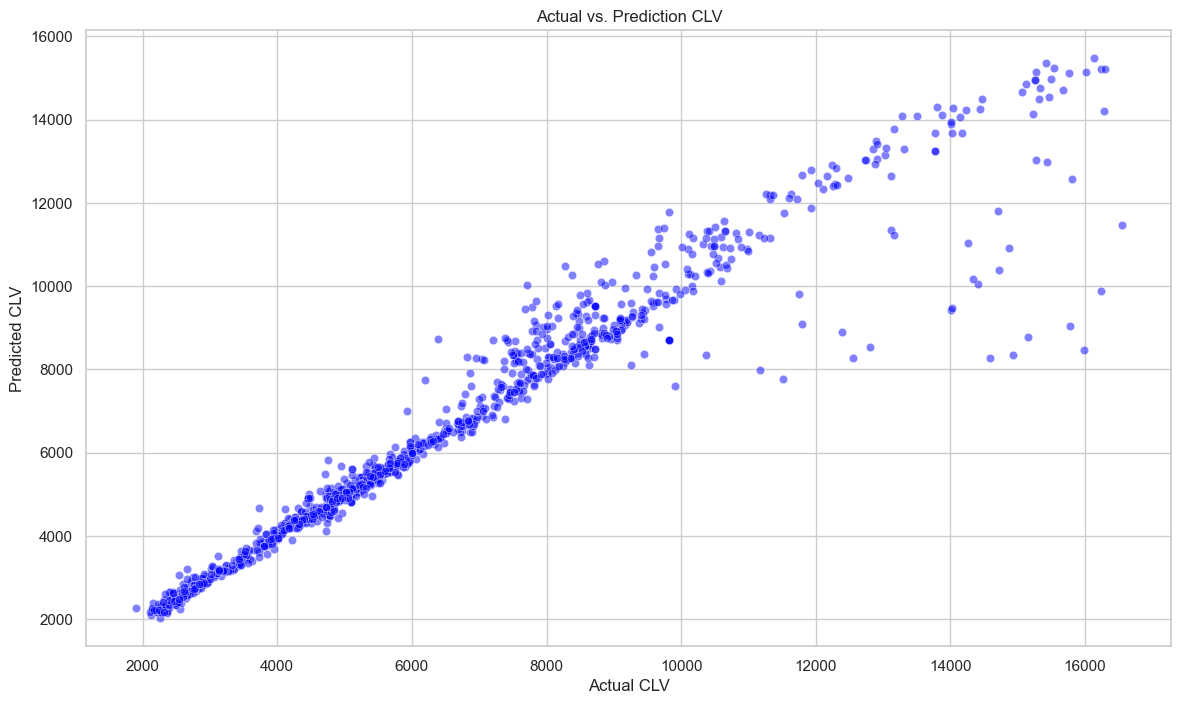

In [151]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning, color='Blue',alpha=0.5).set(title='Actual vs. Prediction CLV', 
                                               xlabel='Actual CLV', 
                                               ylabel='Predicted CLV')

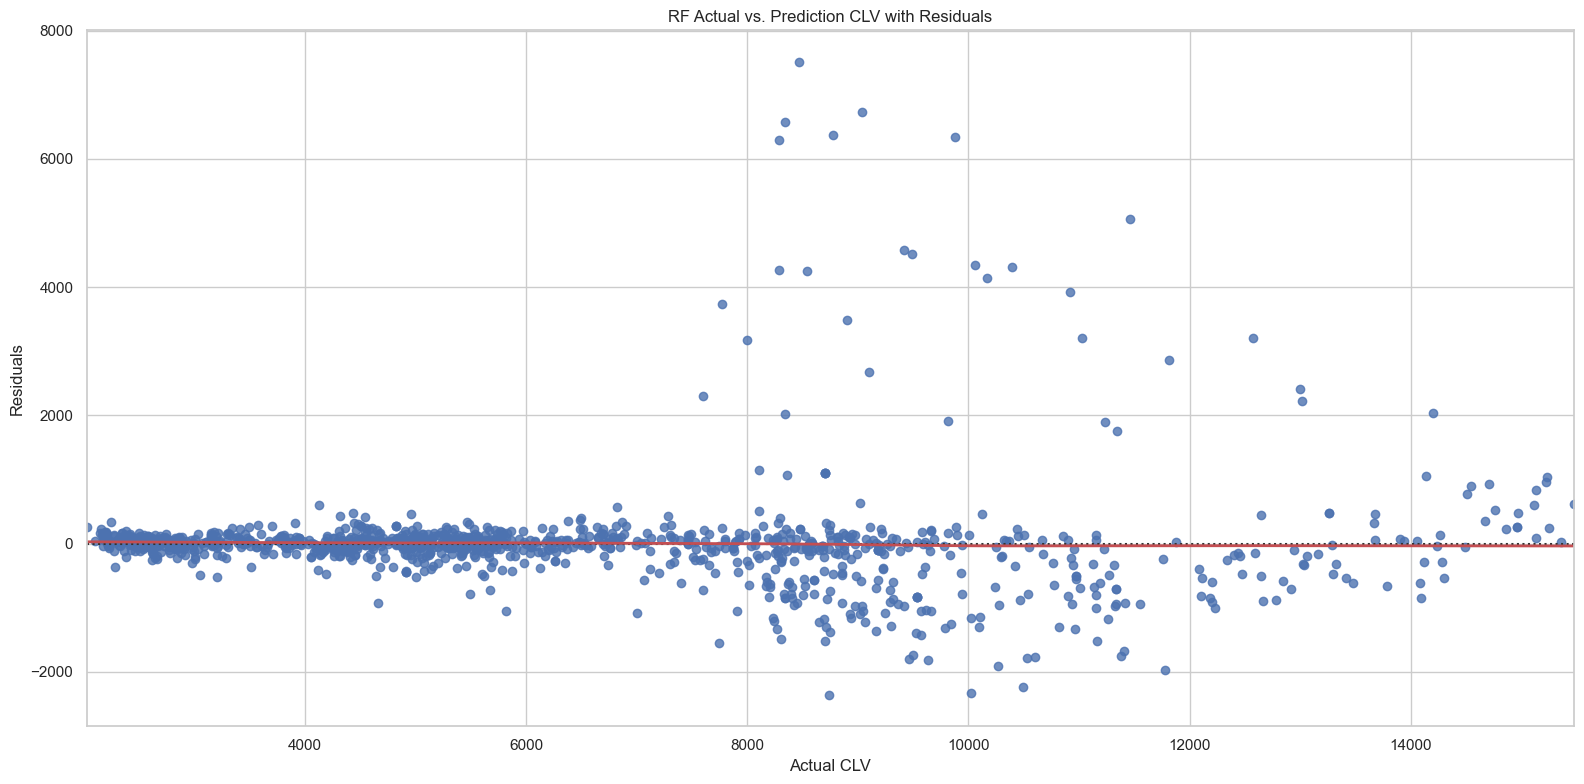

,Jumlah Data,Total Bias
Di atas 2000,27.0,113007.55
Di bawah -2000,3.0,6870.03
Total,30.0,119877.58
Rata-rata,15.0,59938.79


In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung residuals
residuals = y_test - y_pred_xgb_tuning

# Membuat scatter plot dengan garis regresi residual
plt.figure(figsize=(16, 8))
sns.set(style='whitegrid')
sns.residplot(y=y_test, x=y_pred_xgb_tuning, color='b', lowess=True, line_kws={'color': 'r', 'lw': 2})
plt.xlabel('Actual CLV')
plt.ylabel('Residuals')
plt.title('RF Actual vs. Prediction CLV with Residuals')

plt.tight_layout()  # Memastikan tata letak gambar yang rapi
plt.show()

# Menghitung jumlah dan total bias di atas 2000 dan di bawah -2000
count_above_2000 = sum(residual > 2000 for residual in residuals)
sum_above_2000 = sum(residual for residual in residuals if residual > 2000)
count_below_minus_2000 = sum(residual < -2000 for residual in residuals)
sum_below_minus_2000 = sum(residual for residual in residuals if residual < -2000)

# Mengubah nilai bias negatif menjadi positif
sum_above_2000 = abs(sum_above_2000)
sum_below_minus_2000 = abs(sum_below_minus_2000)

# Membuat DataFrame
data = {'Jumlah Data': [count_above_2000, count_below_minus_2000],
        'Total Bias': [sum_above_2000, sum_below_minus_2000]}
index = ['Di atas 2000', 'Di bawah -2000']
df_bias = pd.DataFrame(data, index=index)

# Menambahkan sum jumlah total data dan total bias
df_bias.loc['Total'] = df_bias.sum()

# Menghitung rata-rata dari jumlah data dan total bias
mean_data = df_bias.loc[['Di atas 2000', 'Di bawah -2000'], 'Jumlah Data'].mean()
mean_bias = df_bias.loc[['Di atas 2000', 'Di bawah -2000'], 'Total Bias'].mean()

# Menambahkan baris rata-rata
df_bias.loc['Rata-rata'] = [mean_data, mean_bias]

# Memformat angka menjadi dua angka di belakang koma
df_bias = df_bias.round(2)

df_bias


Jumblah data < -2000 atau > 2000  data bias yang sangat jauh dari hasil prediksi


**kesimpulan :** 
- Performa model untuk memprediksi mulai menurun ketika CLV di angka 8.000 ke atas, walapun seperti itu sebagian besar model telah berhasil membuat prediksi yang mendekati nilai CLV 

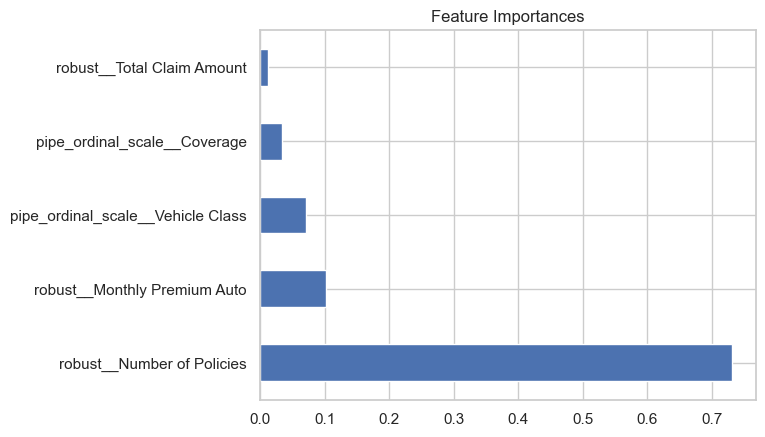

In [153]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()

- Fitur yang paling mempengaruhi CLV adalah 'Number of Policies', 'Monthly Premium Auto', dan 'Vehicle Class'

### **Model VS Model**
---

Alasan mengapa memelih Model XGB

### **Random Forest Regressor**

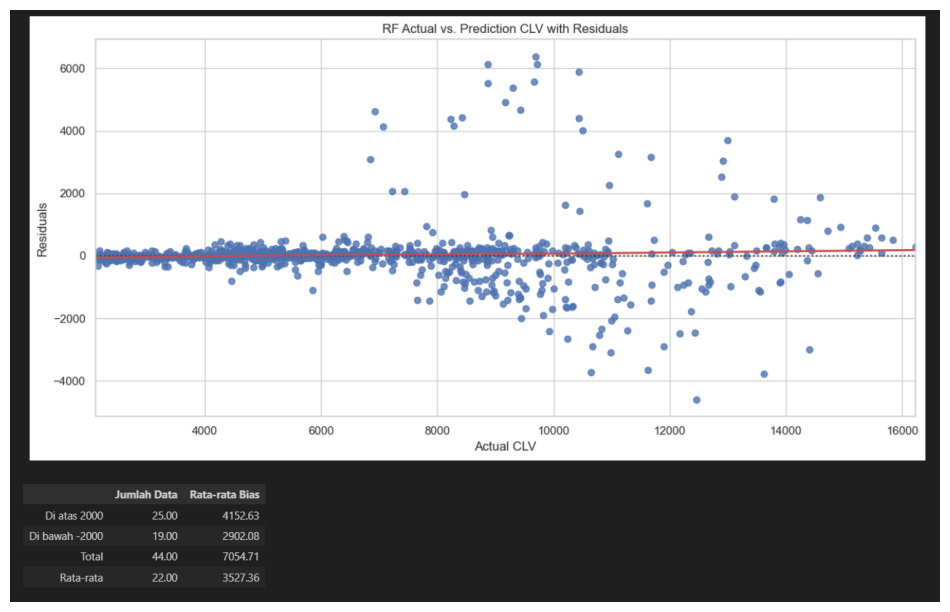

In [154]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path file gambar
image_path = 'rf bias full.png'

# Membaca gambar menggunakan matplotlib
img = mpimg.imread(image_path)

# Membuat figure dengan ukuran yang lebih besar
plt.figure(figsize=(12, 12))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')  # Untuk menghilangkan sumbu koordinat pada plot
plt.show()


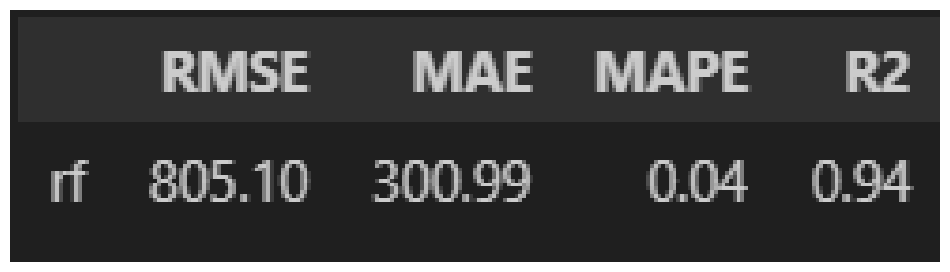

In [155]:
# Path file gambar
image_path = 'rf best score.png'

# Membaca gambar menggunakan matplotlib
img = mpimg.imread(image_path)

# Membuat figure dengan ukuran yang lebih besar
plt.figure(figsize=(12, 12))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')  # Untuk menghilangkan sumbu koordinat pada plot
plt.show()

**Kesimpulan :**

- Setelah dibandingkan dengan hasil predik model lainnya. rf tidak dipilih karena memiliki bias jauh yang lebih banyak model lainnya dituntukan dari jumblah data bias di atas

### **Cat Boost Regressor**

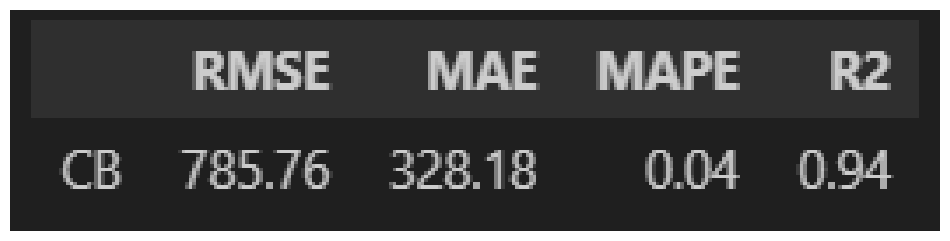

In [156]:
# Path file gambar
image_path = 'cb best score.png'

# Membaca gambar menggunakan matplotlib
img = mpimg.imread(image_path)

# Membuat figure dengan ukuran yang lebih besar
plt.figure(figsize=(12, 12))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')  # Untuk menghilangkan sumbu koordinat pada plot
plt.show()

**Kesimpulan :**

- Setelah dibandingkan dengan hasil predik model lainnya. Cat Boost Regressor tidak dipilih karena memiliki RMSE, MAE, MAPE yang lebih rendah dari XGB

### **Gradient Boosting Regressor**

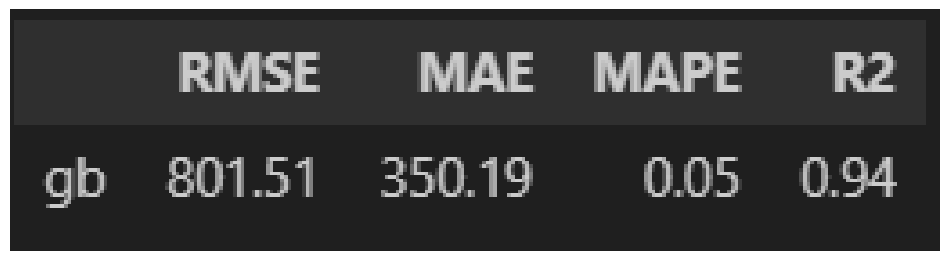

In [157]:

# Path file gambar
image_path = 'gb best score y predik.png'

# Membaca gambar menggunakan matplotlib
img = mpimg.imread(image_path)

# Membuat figure dengan ukuran yang lebih besar
plt.figure(figsize=(12, 12))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')  # Untuk menghilangkan sumbu koordinat pada plot
plt.show()

**Kesimpulan :**
- Terjadi sedikit Overvitting pada Model Gradient Boosting Regressor dari MAPE 4 menjadi 5.
- Setelah dibandingkan dengan hasil predik model lainnya. Gradient Boosting Regressor tidak dipilih karena memiliki RMSE, MAE, MAPE yang lebih rendah dari XGB

**Kesimpulan Model VS Model :**

Dari hasil perbandingan model maka model yang dipakai adalah hasil model terbaik yaitu model XGB

# **7 Conclusion**
---

Dari model yang sudah dibuat, model terbaik yang dipilih untuk memprediksi CLV adalah XGBoost. Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE, MAPE, dan R-squared. Jika dilihat dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sekitar 3.9%, bisa disimpulkan bahwa jika nanti model yang kita buat ini digunakan untuk memprediksi Customer Lifetime Value pada rentang nilai seperti yang dilatih terhadap model, maka hasil prediksi CLVnya rata-rata dapat meleset kurang lebih sekitar 3.9% dari CLV yang seharusnya.

Tapi, tidak menutup kemungkinan juga prediksinya meleset jauh karena bias yang dihasilkan model masih cukup tinggi. Bila dilihat dari visualisasi antara CLV aktual dan prediksi serta residual performa prediksi model mulai menurun ketika CLV sekitar 8.000 keatas. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset dan model butuh lebih banyak data customer lagi untuk model di maintance kedepannya menjadi lebih baik dan agar bias yang dihasilkan tidak teralu jauh dari hasil prediksi.

Dari pemodelan yang sudah dilakukan, perusahaan memiliki model untuk memprediksi nilai Customer Lifetime Value, maka model ini dapat membantu bussiness problem mengenai perhitungan biaya maksimal untuk akuisisi customer. Perusahaan dapat mengatur agar biaya akuisisi tidak sampai melebihi CLV atau sebisa mungkin jauh lebih rendah dibanding CLV agar perusahaan mendapat profit maksimal.

# **8. Recommendation**
---

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi yaitu:

- Eksperimen dalam manipulasi data 
- Eksperimen menggunakan model machine learning lainnya
- Eksperimen hyperparameter tuning lainnya
- Penambahan fitur lain yang behubungan dengan informasi polis customer, seperti informasi berapa bulan lamanya customer sudah menggunakan asuransi dari perusahaan ini.
- Mengecek prediksi data mana saja yang menghasilkan nilai error tinggi. lalu melakukan analisa hubungan antara error tersebut dengan setiap variable independen dengan tujuan untuk mengetahui sebenarnya variable mana saja yang menyebabkan prediksi model menghasilkan error yang tinggi.

**Recommandation Business :**

1. Segmentasi Pelanggan: perusahaan dapat melakukan segmentasi pelanggan yang lebih efektif berdasarkan nilai CLV pelanggan, sehingga dapat menyusun strategi pemasaran yang tepat untuk setiap segmen. Misalnya, segmen dengan CLV 20000 ke atas mungkin menjadi target penawaran khusus atau program loyalitas yang eksklusif.

2. Melakukan Cross-Selling dan Up-Selling, perusahaan dapat menargetkan pelanggan dengan Segmentasi CLV untuk penawaran cross-selling atau up-selling. Bisa dengan perusahaan menawarkan paket asuransi tambahan dengan diskon yang menarik atau meningkatkan perlindungan asuransi kepada pelanggan yang memiliki potensi untuk meningkatkan nilai polis mereka, bisa lebih difokuskan kepada segmentasi pelanggan dengan CLV 20000 ke bawah agar CLV populasi customer kedepannya  meningkat dari 20000 ke bawah menjadi 20000-60000. dengan ini jumblah polis customer dengan CLV 20000 ke atas akan meningkat. Dengan meningkatnya CLV Customer maka pembayaran Premi perbulannya juga akan meningkat sesuai dengan EDA, ini akan meningkatkan profit dan income perusahaan. 

3. Pengembangan Produk dan Layanan: Perusahaan dapat menggunakan informasi prediksi CLV untuk mengembangkan produk dan layanan baru yang sesuai dengan kebutuhan pelanggan yang berharga, meningkatkan kepuasan pelanggan, dan memperkuat loyalitas mereka. perusahaan dapat meluncurkan polis asuransi khusus untuk segmen pelanggan dengan CLV 20000 ke atas dengan manfaat tambahan seperti perlindungan hukum atau asuransi penyewaan mobil. 

4. Pengelolaan Biaya Akuisisi Pelanggan dan mengoptimalkan pengeluaran pemasaran yang lebih tertarget, biasanya biaya akuisisi pelanggan cukup tinggi. Dengan mengetahui CLV, perusahaan dapat menghitung kembali keseimbangan antara biaya akuisisi dan nilai jangka panjang yang diharapkan dari pelanggan. Ini dapat membantu perusahaan dalam mengoptimalkan pengeluaran pemasaran dan mengalokasikan sumber daya dengan lebih efisien. 

5. Retensi Pelanggan, Perusahaan dapat memfokuskan upaya retensi pada pelanggan dengan CLV 20000 ke atas atau tinggi. Ini bisa dilakukan dengan memberikan pelayanan pelanggan yang baik, penawaran khusus, atau program loyalitas yang dirancang untuk mempertahankan pelanggan berharga.


Secara keseluruhan, dengan kemampuan memprediksi CLV, perusahaan asuransi mobil dapat mengoptimalkan strategi pemasaran, meningkatkan retensi pelanggan, meningkatkan penjualan produk, mengelola biaya akuisisi pelanggan, dan mengembangkan produk dan layanan yang lebih baik. Hal ini dapat berdampak positif pada keuntungan jangka panjang perusahaan, meningkatkan pertumbuhan bisnis, dan memperkuat posisi persaingan di industri asuransi mobil.

In [158]:
import pickle

# best model
xgb_tuning = random_xgb.best_estimator_
xgb_tuning

# fit
xgb_tuning.fit(X, y)

# save with pickle
pickle.dump(xgb_tuning, open('finalmodel_XGBoost.sav', 'wb'))